In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
train_dir = r"D:\GEN AI\assignment 1\Hindi\Train"
test_dir = r"D:\GEN AI\assignment 1\Hindi\Test"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Load images from Train folders
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),        
    color_mode='grayscale',      
    batch_size=32,
    class_mode='categorical'     
)

Found 78200 images belonging to 46 classes.


In [5]:
# load images from Test folders
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

Found 13801 images belonging to 46 classes.


In [6]:
print(train_data.class_indices)

{'character_10_yna': 0, 'character_11_taamatar': 1, 'character_12_thaa': 2, 'character_13_daa': 3, 'character_14_dhaa': 4, 'character_15_adna': 5, 'character_16_tabala': 6, 'character_17_tha': 7, 'character_18_da': 8, 'character_19_dha': 9, 'character_1_ka': 10, 'character_20_na': 11, 'character_21_pa': 12, 'character_22_pha': 13, 'character_23_ba': 14, 'character_24_bha': 15, 'character_25_ma': 16, 'character_26_yaw': 17, 'character_27_ra': 18, 'character_28_la': 19, 'character_29_waw': 20, 'character_2_kha': 21, 'character_30_motosaw': 22, 'character_31_petchiryakha': 23, 'character_32_patalosaw': 24, 'character_33_ha': 25, 'character_34_chhya': 26, 'character_35_tra': 27, 'character_36_gya': 28, 'character_3_ga': 29, 'character_4_gha': 30, 'character_5_kna': 31, 'character_6_cha': 32, 'character_7_chha': 33, 'character_8_ja': 34, 'character_9_jha': 35, 'digit_0': 36, 'digit_1': 37, 'digit_2': 38, 'digit_3': 39, 'digit_4': 40, 'digit_5': 41, 'digit_6': 42, 'digit_7': 43, 'digit_8': 4

In [7]:
#cnn architecture

model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))  
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # prevents overfitting

# Output Layer 
model.add(Dense(train_data.num_classes, activation='softmax'))


C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 46)                  │           5,934 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,270 (641.68 KB)

 Trainable params: 164,270 (641.68 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
epochs = 20
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=test_data
)

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 1126s 459ms/step - accuracy: 0.5308 - loss: 1.7060 - val_accuracy: 0.9445 - val_loss: 0.1893
Epoch 2/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 938s 384ms/step - accuracy: 0.8995 - loss: 0.3258 - val_accuracy: 0.9622 - val_loss: 0.1242
Epoch 3/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 1093s 447ms/step - accuracy: 0.9362 - loss: 0.2015 - val_accuracy: 0.9725 - val_loss: 0.0900
Epoch 4/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 1070s 438ms/step - accuracy: 0.9512 - loss: 0.1554 - val_accuracy: 0.9777 - val_loss: 0.0767
Epoch 5/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 234s 96ms/step - accuracy: 0.9611 - loss: 0.1243 - val_accuracy: 0.9782 - val_loss: 0.0738
Epoch 6/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.9681 - loss: 0.1031 - val_accuracy: 0.9813 - val_loss: 0.0675
Epoch 7/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9720 - loss: 0.0912 - val_accuracy: 0.9822 - val_loss: 0.0667
Epoch 8/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accura

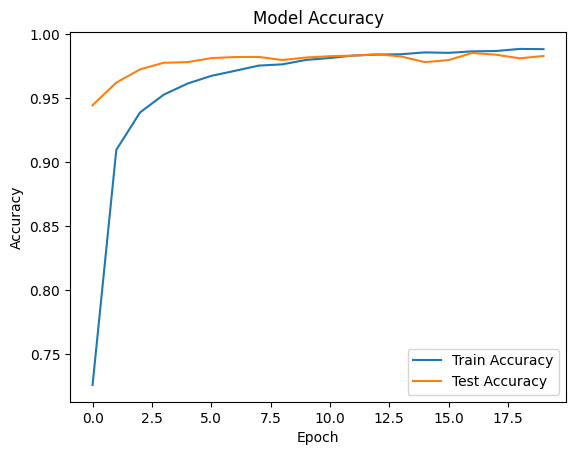

In [11]:
# Accuracy plot

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


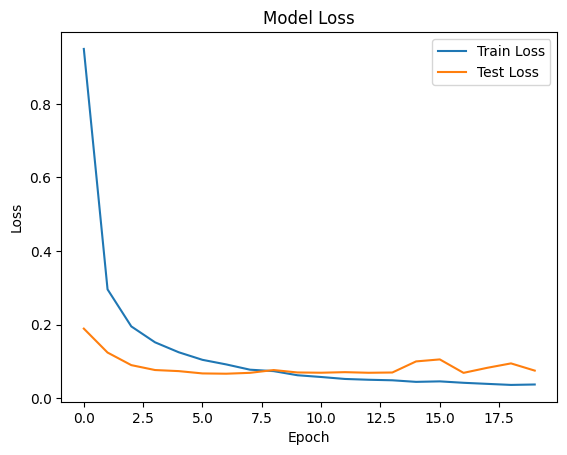

In [12]:
# Loss plot

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model.save("hindi_character_cnn_model.keras")

*PREDICTION*

In [24]:
img_path = r"D:\GEN AI\assignment 1\Hindi\Train\character_10_yna\128.png"

In [25]:
print(img_path)

D:\GEN AI\assignment 1\Hindi\Train\character_10_yna\128.png


In [26]:
img = image.load_img(img_path, target_size=(32, 32), color_mode='grayscale')

In [27]:
# Convert image to array
img_array = image.img_to_array(img)

In [28]:
img_array = img_array / 255.0

In [29]:
img_array = np.expand_dims(img_array, axis=0)

In [30]:
prediction = model.predict(img_array)
predicted_class =int(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [31]:
train_data.class_indices

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 

In [32]:
labels = dict((v, k) for k, v in train_data.class_indices.items())
predicted_label = labels[predicted_class]

In [33]:
print("Predicted Class:", predicted_label)

Predicted Class: character_10_yna
